### Original pitch

```
xii 400 600 600 (399 594 594) (G4 391.9954  D5 587.3295  D5 587.3295)
iv  600 500     (598 497)     (D5 587.3295  B4 493.8833)
1/2 1600        (1602)        (A6 1760.000)

x   400   399   G4  391.9954 (n=7)
v   500   497   B4  493.8833 (n=11)
i   600   594   D5  587.3295 (n=14)
/  1600  1602   G6 1567.9900 (n=31)  closer to original, ignored, don't want another G
/  1600  1602   A6 1760.0000 (n=33)
```


In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# ordinary
# sample_rate = 44100

# standard professional
# sample_rate = 48000

# dvd
# sample_rate = 96000

# blu ray
sample_rate = 192000


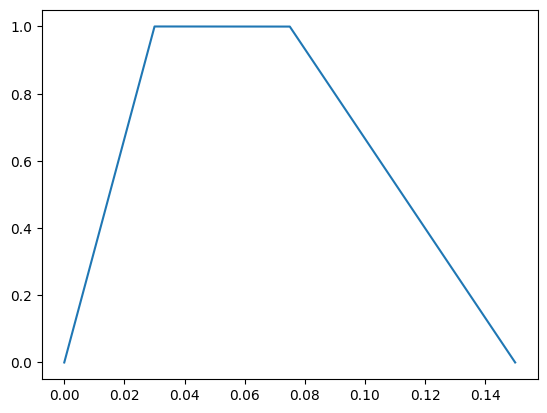

array([0.00000000e+00, 1.73641257e-04, 3.47282514e-04, ...,
       1.38898535e-04, 6.94492673e-05, 0.00000000e+00])

In [3]:
def modulo(lenght=0.15, show=False):
    # fade in  0.000-0.030 (first 20%)
    # fade out 0.075-0.150 (last  50%)

    t = np.arange(0, lenght, 1.0 / sample_rate)

    i_s = np.arange(0, lenght * 0.2, 1.0 / sample_rate).size
    o_s = np.arange(lenght * 0.5, lenght, 1.0 / sample_rate).size

    y = np.append(
        np.linspace(0, 1, i_s), np.linspace(1, 1, t.size - i_s - o_s)
    )
    y = np.append(y, np.linspace(1, 0, o_s))

    if show:
        plt.plot(t, y)
        plt.show()

    return y


modulo(show=True)


### Pitch formula

$$p\left(n\right)=440\cdot\sqrt[12]{2^{n-9}}=440\cdot2^{\frac{n-9}{12}}$$

```js
let p = (n) => 440 * Math.pow(2, (n - 9) / 12)
```

In [2]:
def pitch(n):
    return 440 * (2 ** ((n - 9) / 12))


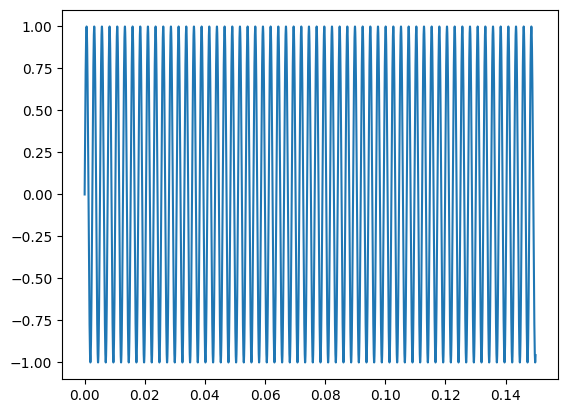

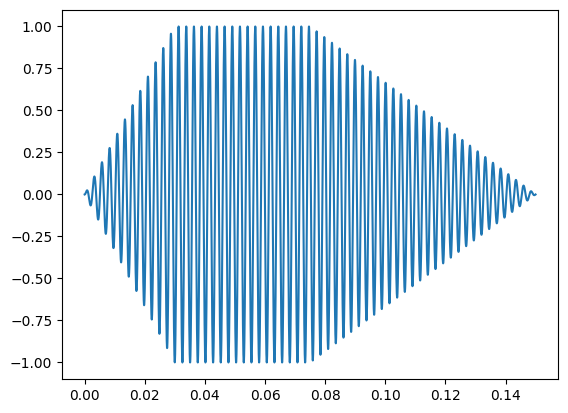

array([ 0.00000000e+00,  2.22741254e-06,  8.90891710e-06, ...,
       -1.33815345e-04, -6.66633644e-05, -0.00000000e+00])

In [4]:
def wave(f, lenght=0.15, modulate=False, show=False):
    t = np.arange(0, lenght, 1.0 / sample_rate)
    signal = np.sin(np.pi * 2 * f * t)

    if modulate:
        signal = np.multiply(modulo(lenght), signal)

    if show:
        plt.plot(t, signal)
        # plt.plot(t, signal, "o")
        # plt.xlim([lenght*0.45, lenght*0.453])
        plt.show()

    return signal


wave(pitch(7), show=True)
wave(pitch(7), modulate=True, show=True)


In [5]:
def saveWAV(signal, name):
    wavfile.write(
        "out/" + name + ".wav", sample_rate, np.int16(signal * 32767)
    )


```
x   400   399   G4  391.9954 (n=7)
v   500   497   B4  493.8833 (n=11)
i   600   594   D5  587.3295 (n=14)
/  1600  1602   G6 1567.9900 (n=31)  closer to original, ignored, don't want another G
/  1600  1602   A6 1760.0000 (n=33)
```

In [6]:
roman_pitch = {
    "i": {"p": 14, "l": 0.15},
    "v": {"p": 11, "l": 0.15},
    "x": {"p": 7, "l": 0.15},
    "h": {"p": 33, "l": 0.05},
}


In [7]:
for r in roman_pitch.keys():
    roman_pitch[r]["f"] = pitch(roman_pitch[r]["p"])
    roman_pitch[r]["f_"] = round(pitch(roman_pitch[r]["p"]))
    roman_pitch[r]["s"] = wave(
        roman_pitch[r]["f"], lenght=roman_pitch[r]["l"], modulate=True
    )
    saveWAV(roman_pitch[r]["s"], str(roman_pitch[r]["f_"]))


In [8]:
numonotes = {
    "00-2": {"roman": "h"}, # half hours
    "01-0": {"roman": "i"},
    "02-0": {"roman": "ii"},
    "03-0": {"roman": "iii"},
    "04-0": {"roman": "iv"},
    "05-0": {"roman": "v"},
    "06-0": {"roman": "vi"},
    "07-0": {"roman": "vii"},
    "08-0": {"roman": "viii"},
    "09-0": {"roman": "ix"},
    "10-0": {"roman": "x"},
    "11-0": {"roman": "xi"},
    "12-0": {"roman": "xii"},
}


In [9]:
for i in numonotes.keys():
    numonotes[i]["song"] = roman_pitch[numonotes[i]["roman"][0]]["s"]
    for j in list(numonotes[i]["roman"][1:]):
        numonotes[i]["song"] = np.append(
            numonotes[i]["song"], roman_pitch[j]["s"]
        )
    saveWAV(numonotes[i]["song"], i + "-" + numonotes[i]["roman"])
    # also save half hour
    # saveWAV(
    #     np.append(numonotes[i]["song"], roman_pitch["h"]["s"]),
    #     i[:-1] + "2-" + numonotes[i]["roman"] + "h",
    # )


### Useful links

- https://www.youtube.com/watch?v=iNmtSnb7TlQ
- https://en.wikipedia.org/wiki/Scientific_pitch_notation
- https://twistedwave.com/online
- https://convertio.co/pt/caf-wav/
- https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Audio_sampling